In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(os.pardir)  # 부모 디렉터리의 파일을 가져올 수 있도록 설정
from dataset.mnist import load_mnist
from common.util import smooth_curve
from common.multi_layer_net import MultiLayerNet
from common.optimizer import SGD

In [2]:
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True)

train_size = x_train.shape[0]
batch_size = 128
max_iterations = 2000


In [3]:
weight_init_types = {'std=0.01': 0.01, 'Xavier': 'sigmoid', 'He': 'relu'}
optimizer = SGD(lr=0.01)

networks = {}
train_loss = {}
for key, weight_type in weight_init_types.items():
    networks[key] = MultiLayerNet(input_size=784, hidden_size_list=[100, 100, 100, 100],
                                  output_size=10, weight_init_std=weight_type)
    train_loss[key] = []

In [4]:
for i in range(max_iterations):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]

    for key in weight_init_types.keys():
        grads = networks[key].gradient(x_batch, t_batch)
        optimizer.update(networks[key].params, grads)

        loss = networks[key].loss(x_batch, t_batch)
        train_loss[key].append(loss)

    if i % 100 == 0:
        print("===========" + "iteration:" + str(i) + "===========")
        for key in weight_init_types.keys():
            loss = networks[key].loss(x_batch, t_batch)
            print(key + ":" + str(loss))

===========iteration:0===========
std=0.01:2.3025610310849847
Xavier:2.316190144700021
He:2.3532702426411305
===========iteration:100===========
std=0.01:2.30305965440675
Xavier:2.2677763788423304
He:1.4315240370222782
===========iteration:200===========
std=0.01:2.30252305010514
Xavier:2.194116696941314
He:0.6314492572003347
===========iteration:300===========
std=0.01:2.3039824498007393
Xavier:1.9882621097743387
He:0.4889743108848381
===========iteration:400===========
std=0.01:2.3010365678764875
Xavier:1.5479888394625414
He:0.3689466728563001
===========iteration:500===========
std=0.01:2.3024874306991827
Xavier:1.165339274325759
He:0.4666216583637624
===========iteration:600===========
std=0.01:2.3013898242904793
Xavier:0.7804641313315558
He:0.413593291197899
===========iteration:700===========
std=0.01:2.3008840405678903
Xavier:0.5625328631396274
He:0.2983276735008564
===========iteration:800===========
std=0.01:2.303319183136038
Xavier:0.4489204242229585
He:0.23453357048746798
==

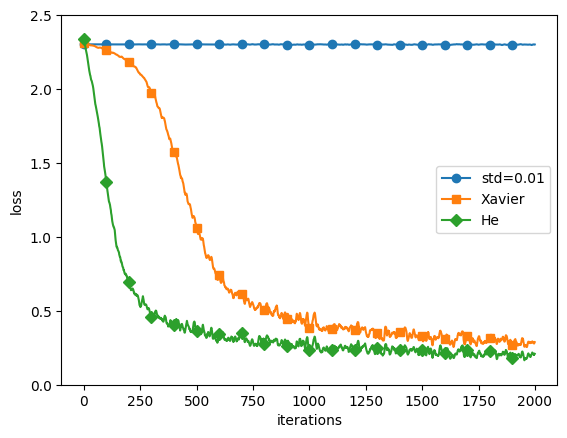

In [5]:
markers = {'std=0.01': 'o', 'Xavier': 's', 'He': 'D'}
x = np.arange(max_iterations)
for key in weight_init_types.keys():
    plt.plot(x, smooth_curve(train_loss[key]), marker=markers[key], markevery=100, label=key)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.ylim(0, 2.5)
plt.legend()
plt.show()